In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
train_x = x_train.astype('float32') / 255  # normalization
test_x = x_test.astype('float32') / 255
train_y = to_categorical(y_train)   # create label vectors
test_y = to_categorical(y_test)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


In [2]:
model = models.Sequential()

### make model here ###
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))



model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

In [3]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
history = model.fit(
    train_x,
    train_y,
    batch_size=64,
    epochs=25,
    validation_data=(test_x, test_y),
)

Epoch 1/25
782/782 [==============================] - 27s 34ms/step - loss: 1.7427 - accuracy: 0.3639 - val_loss: 1.7074 - val_accuracy: 0.3906
Epoch 2/25
782/782 [==============================] - 26s 33ms/step - loss: 1.2803 - accuracy: 0.5447 - val_loss: 1.2129 - val_accuracy: 0.5639
Epoch 3/25
782/782 [==============================] - 26s 33ms/step - loss: 1.0423 - accuracy: 0.6323 - val_loss: 1.0447 - val_accuracy: 0.6309
Epoch 4/25
782/782 [==============================] - 26s 34ms/step - loss: 0.8764 - accuracy: 0.6954 - val_loss: 1.0147 - val_accuracy: 0.6437
Epoch 5/25
782/782 [==============================] - 26s 34ms/step - loss: 0.7528 - accuracy: 0.7388 - val_loss: 0.9622 - val_accuracy: 0.6801
Epoch 6/25
782/782 [==============================] - 25s 32ms/step - loss: 0.6623 - accuracy: 0.7699 - val_loss: 0.9734 - val_accuracy: 0.6868
Epoch 7/25
782/782 [==============================] - 25s 32ms/step - loss: 0.5880 - accuracy: 0.7946 - val_loss: 1.0106 - val_accuracy:

In [5]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Accuracy Curves')

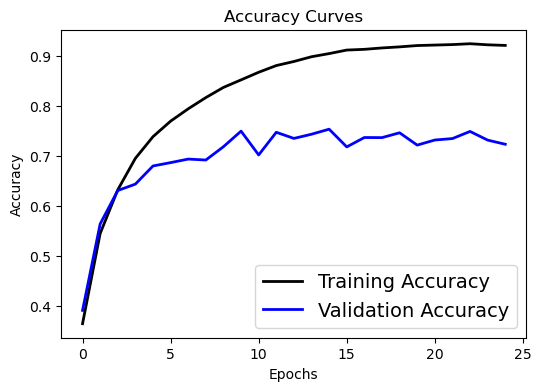

In [6]:
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

Text(0.5, 1.0, 'Loss Curves')

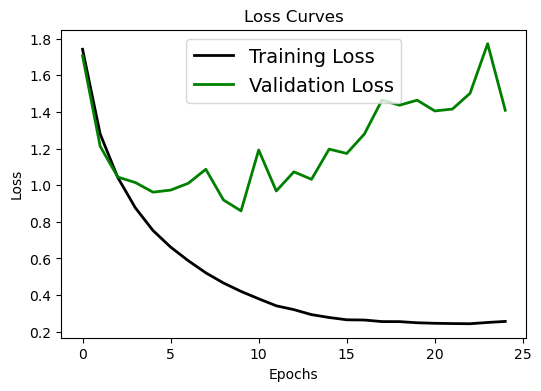

In [7]:
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

In [8]:
model.save('keras_CNN_CIFAR10.model')

INFO:tensorflow:Assets written to: keras_CNN_CIFAR10.model/assets


INFO:tensorflow:Assets written to: keras_CNN_CIFAR10.model/assets
